In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

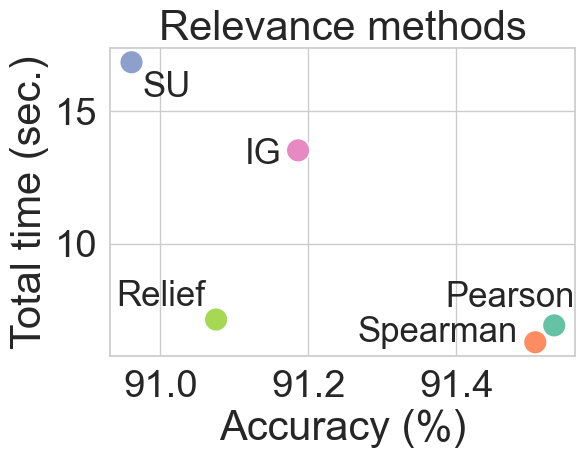

In [8]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('../../autofeat_results/relevance_paper_plot/all_results.csv')
runtime = runtime.loc[-runtime['DATASET NAME'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["CURRENT PERFORMANCE"] = pd.to_numeric(runtime["CURRENT PERFORMANCE"])

a = runtime[['CURRENT PERFORMANCE', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
b = runtime[['CURRENT RUNTIME', "CORRELATION METHOD"]].groupby("CORRELATION METHOD").mean()
a["CURRENT PERFORMANCE"] = a["CURRENT PERFORMANCE"].multiply(100)

a = pd.concat([a, b], axis=1)
a = a.reindex(['Pearson', 'Spearman', 'SU', 'IG', 'Relief'])
a['CORRELATION METHOD'] = ['Pearson', 'Spearman', 'SU', 'IG', 'Relief']

g = sns.scatterplot(
    data=a,
    x="CURRENT PERFORMANCE", y="CURRENT RUNTIME", hue='CORRELATION METHOD',
    s=300, palette="Set2"
)

for i, row in a[a['CORRELATION METHOD'].isin(['Pearson'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-32, 13), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Spearman'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-70, 0), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['Relief'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-40, 10), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['SU'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(25, -25), ha='center', fontsize=25)

for i, row in a[a['CORRELATION METHOD'].isin(['IG'])].iterrows():
    plt.annotate(row['CORRELATION METHOD'], (row['CURRENT PERFORMANCE'], row['CURRENT RUNTIME']), textcoords="offset points", xytext=(-25, -10), ha='center', fontsize=25)

g.set_ylabel('Total time (sec.)') #labelpad=60)
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Relevance methods')
plt.savefig('relevance_methods_performance.pdf', dpi=1200, bbox_inches="tight")